# Internshala Airbnb Price Prediction Project Part A

# Video explanation link: https://drive.google.com/file/d/1UPFruARcwBCv4idBa-rQ7ITkb2J18j15/view?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# Load Data

In [2]:
df = pd.read_excel("Airbnb_data.xlsx")

In [3]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74105 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [5]:
df.describe()

,id,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,55812.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,0.943520,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,0.163418,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,1.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [6]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values/len(df))*100

missing_df = pd.DataFrame({'Missing Values' : missing_values, 'Percentage' : missing_percentage})
missing_df[missing_df['Missing Values']>0]

,Missing Values,Percentage
host_response_rate,18299,24.691341
review_scores_rating,16722,22.563452
first_review,15864,21.405729
last_review,15827,21.355804
thumbnail_url,8216,11.086074
neighbourhood,6872,9.272578
zipcode,968,1.306149
bathrooms,200,0.269865
host_identity_verified,188,0.253674
host_since,188,0.253674


In [7]:
# Drop columns not useful for regression
drop_cols = ['id', 'name', 'description', 'thumbnail_url', 'amenities', 'zipcode']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

# Convert to datetime
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

# Host tenure
df['host_tenure_days'] = (pd.Timestamp.now() - df['host_since']).dt.days
df['listing_age_days'] = (pd.Timestamp.now() - df['first_review']).dt.days
df['days_since_last_review'] = (pd.Timestamp.now() - df['last_review']).dt.days

# Fill NaNs
df['host_response_rate'] = df['host_response_rate'].astype(str).str.replace('%', '', regex=False)
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].median())

df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].median())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['beds'] = df['beds'].fillna(df['beds'].median())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['neighbourhood'] = df['neighbourhood'].fillna('Unknown')

# Drop original date columns
df.drop(['host_since', 'first_review', 'last_review'], axis=1, inplace=True)

# Convert t/f and bool to binary
binary_cols = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'cleaning_fee']
df[binary_cols] = df[binary_cols].replace({'t': 1, 'f': 0, True: 1, False: 0})


C:\Users\danis\AppData\Local\Temp\ipykernel_16760\2619639011.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['host_since'] = pd.to_datetime(df['host_since'])
C:\Users\danis\AppData\Local\Temp\ipykernel_16760\2619639011.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['first_review'] = pd.to_datetime(df['first_review'])
C:\Users\danis\AppData\Local\Temp\ipykernel_16760\2619639011.py:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_review'] = pd.to_datetime(df['last_review'])
C:\Users\danis\AppData\Local\Temp\ipykernel_16760\2619639011.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remov

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   accommodates            74111 non-null  int64  
 4   bathrooms               74111 non-null  float64
 5   bed_type                74111 non-null  object 
 6   cancellation_policy     74111 non-null  object 
 7   cleaning_fee            74111 non-null  int64  
 8   city                    74111 non-null  object 
 9   host_has_profile_pic    73923 non-null  float64
 10  host_identity_verified  73923 non-null  float64
 11  host_response_rate      74111 non-null  float64
 12  instant_bookable        74111 non-null  int64  
 13  latitude                74111 non-null  float64
 14  longitude               74111 non-null

In [10]:
#Label Encoding
cat_cols = ['property_type','room_type','bed_type','cancellation_policy','city','neighbourhood']
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [93]:
# Feature variable is X and Target is y
y = np.exp(df['log_price'])
X = df.drop(columns = ['log_price'])

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)

In [94]:
df.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,...,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds,host_tenure_days,listing_age_days,days_since_last_review
0,5.010635,0,0,3,1.0,4,2,1,4,1.0,...,40.696524,-73.991617,77,2,100.0,1.0,1.0,4856.0,3311.0,3281.0
1,5.129899,0,0,7,1.0,4,2,1,4,1.0,...,40.766115,-73.989040,252,6,93.0,3.0,3.0,2945.0,2987.0,2849.0
2,4.976734,0,0,5,1.0,4,1,1,4,1.0,...,40.808110,-73.943756,247,10,92.0,1.0,3.0,3182.0,2995.0,2858.0
3,6.620073,17,0,4,1.0,4,0,1,5,1.0,...,37.772004,-122.431619,325,0,96.0,2.0,2.0,3737.0,NaN,NaN
4,4.744932,0,0,2,1.0,4,1,1,2,1.0,...,38.925627,-77.034596,119,4,40.0,0.0,1.0,3843.0,3507.0,3093.0


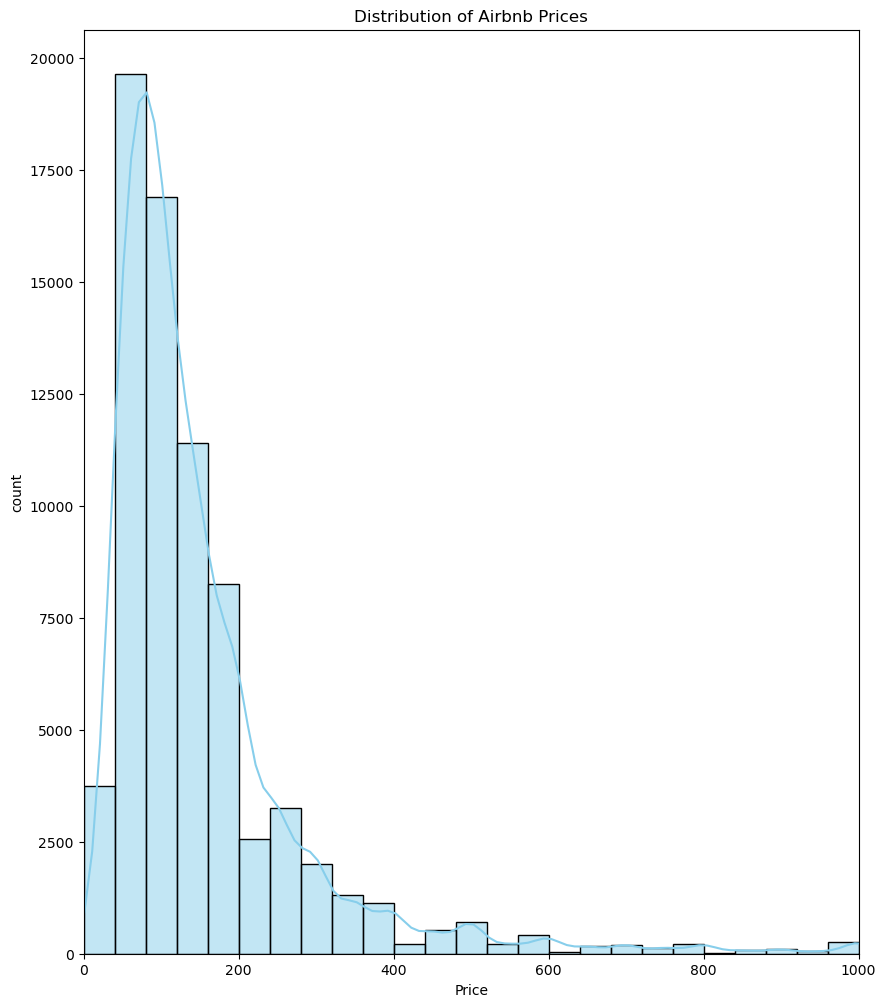

In [18]:
#Price Distribution

plt.figure (figsize = (10,12))
sns.histplot(np.exp(df['log_price']), bins = 50 , kde = True, color = 'skyblue')
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('count')
plt.xlim(0,1000)
plt.show()

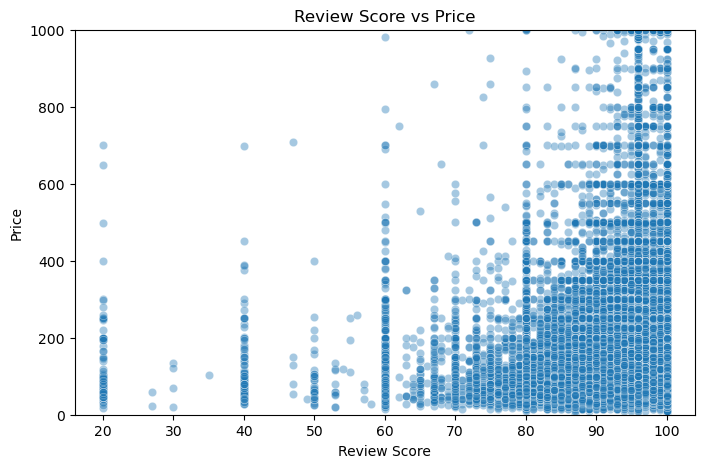

In [21]:
#Review Score vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='review_scores_rating', y=np.exp(df['log_price']), data=df, alpha=0.4)
plt.title('Review Score vs Price')
plt.xlabel('Review Score')
plt.ylabel('Price')
plt.ylim(0, 1000)
plt.show()

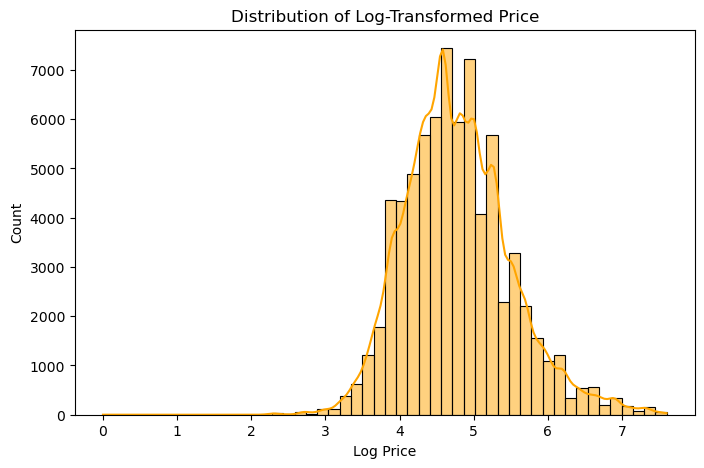

In [22]:
# Log price distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['log_price'], bins=50, kde=True, color='orange')
plt.title('Distribution of Log-Transformed Price')
plt.xlabel('Log Price')
plt.ylabel('Count')
plt.show()

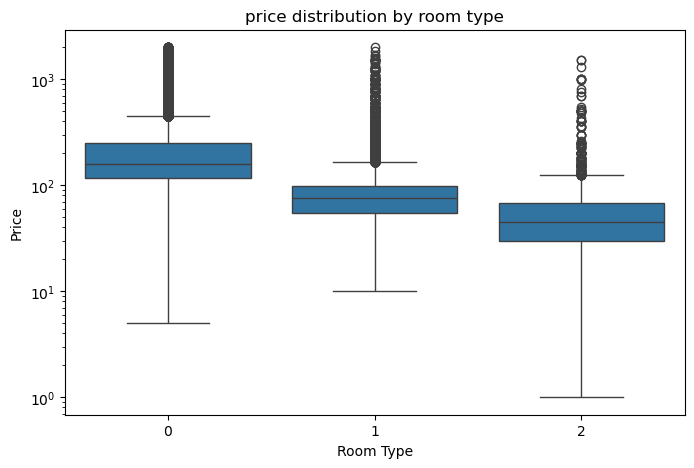

In [23]:
# Room type vs price
plt.figure(figsize=(8,5))
sns.boxplot (x = 'room_type', y = np.exp(df['log_price']), data = df)
plt.title ('price distribution by room type')
plt.yscale('log')
plt.xlabel ('Room Type')
plt.ylabel ('Price')
plt.show()

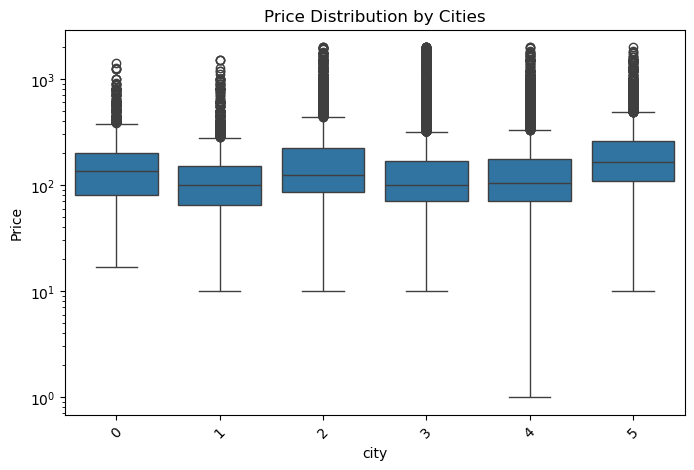

In [32]:
cities = df['city'].value_counts().nlargest(6).index
df_cities = df[df['city'].isin(top_cities)]

plt.figure(figsize=(8, 5))
sns.boxplot(x='city', y=np.exp(df_cities['log_price']), data=df_cities)
plt.yscale('log')
plt.title('Price Distribution by Cities')
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.show()

In [34]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/150.0 MB 16.7 MB/s eta 0:00:09
   - -------------------------------------- 3.9/150.0 MB 11.8 MB/s eta 0:00:13
   - -------------------------------------- 5.2/150.0 MB 10.3 MB/s eta 0:00:15
   - -------------------------------------- 7.1/150.0 MB 9.9 MB/s eta 0:00:15
   -- ------------------------------------- 9.4/150.0 MB 9.6 MB/s eta 0:00:15
   -- ------------------------------------- 10.7/150.0 MB 9.1 MB/s eta 0:00:16
   --- ------------------------------------ 11.5/150.0 MB 8.3 MB/s eta 0:00:17
   --- ------------------------------------ 12.3/150.0 MB 7.8 MB/s eta 0:00:18
   --- ------------------------------------ 13.1/150.0 MB 7.1 MB/s eta 0:00:20
   --- ------------------------------------ 13.6/150.0 MB 6.9 MB/s eta 0:00:20
   --- ------------------------------------ 14.4/150.0 MB 6.5 MB/s eta 0:00:21
   ---- ----------------------------------- 15.2/150.0 MB 6.2 

In [49]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as pd

In [46]:
# Defining Evaluation Function
def print_metrics (model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error (y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    accuracy = r2* 100

    print(f"{model_name}:")
    print(f"Accuracy - {accuracy:.2f}%")
    print(f"RMSE     - {rmse:.2f}")
    print(f"MAE      - {mae:.2f}")
    print(f"R²       - {r2:.4f}")
    print("-" * 40 )

In [47]:
# Random Forest
rf = RandomForestRegressor(n_estimators = 100, max_depth = 10, random_state = 42)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)
print_metrics ("Random Forest", y_test, y_pred_rf)

Random Forest:
Accuracy - 52.86%
RMSE     - 117.50
MAE      - 56.89
R²       - 0.5286
----------------------------------------


In [48]:
# XGBoost
xgb = XGBRegressor (n_estimators = 100, learning_rate = 0.1, max_depth = 6, random_state = 42)
xgb.fit (X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print_metrics ("XGBoost", y_test, y_pred_xgb)

XGBoost:
Accuracy - 56.77%
RMSE     - 112.51
MAE      - 53.77
R²       - 0.5677
----------------------------------------


In [55]:
# For simplicity, use median imputation
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [58]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_imputed, y_train)

y_pred_lr = lr.predict(X_test_imputed)
print_metrics("Linear Regression", y_test, y_pred_lr)

Linear Regression:
Accuracy - 39.55%
RMSE     - 133.05
MAE      - 71.24
R²       - 0.3955
----------------------------------------


In [59]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train SVR
svr = SVR(C=1.0, epsilon=0.2)
svr.fit(X_train_scaled, y_train)

y_pred_svr = svr.predict(X_test_scaled)
print_metrics("Support Vector Regression", y_test, y_pred_svr)

# Took almost 5 minutes to run SVR, Support Vector Regression is known to be computationally expensive, especially with
#Large Dataset , no GPU Support, doesnt scale well with large dataet , and performance is also not the best.

Support Vector Regression:
Accuracy - 26.73%
RMSE     - 146.48
MAE      - 63.11
R²       - 0.2673
----------------------------------------


In [60]:
# Random Forest Parameter tuning
from sklearn.model_selection import GridSearchCV
rf_params = {'n_estimators': [100, 200],'max_depth': [10, 20, None],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2]}
rf_grid = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_params,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1)
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [69]:
# Tuned Random Forest Regressor Model
best_rf = rf_grid.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)
print_metrics("Tuned Random Forest", y_test, y_pred_rf_best)

Tuned Random Forest:
Accuracy - 54.95%
RMSE     - 114.86
MAE      - 54.27
R²       - 0.5495
----------------------------------------


In [70]:
xgb_params = {'n_estimators': [100, 200],'learning_rate': [0.05, 0.1],'max_depth': [4, 6, 8],'subsample': [0.8, 1],'colsample_bytree': [0.8, 1]}

xgb_grid = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=xgb_params,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1)

xgb_grid.fit(X_train, y_train)

# Best model and prediction
best_xgb = xgb_grid.best_estimator_
y_pred_xgb_best = best_xgb.predict(X_test)
print_metrics("Tuned XGBoost", y_test, y_pred_xgb_best)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Tuned XGBoost:
Accuracy - 57.70%
RMSE     - 111.30
MAE      - 52.74
R²       - 0.5770
----------------------------------------


In [71]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [72]:
#CatBoost Regressor
from catboost import CatBoostRegressor

# You can pass categorical columns directly (no label encoding needed)
cat_features = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'neighbourhood']

catboost = CatBoostRegressor(verbose=0, random_state=42)
catboost.fit(X_train, y_train, cat_features=cat_features)

y_pred_cat = catboost.predict(X_test)
print_metrics("CatBoost Regressor", y_test, y_pred_cat)


CatBoost Regressor:
Accuracy - 58.13%
RMSE     - 110.74
MAE      - 52.60
R²       - 0.5813
----------------------------------------


In [73]:
pip install light

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [7 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\danis\AppData\Local\Temp\pip-install-feu3k8kc\light_f5c194aeda9349bc8219ada1d510c295\setup.py", line 43, in <module>
      with open(os.path.join(thisdir, "requirements.txt"), "r") as f:
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\danis\\AppData\\Local\\Temp\\pip-install-feu3k8kc\\light_f5c194aeda9349bc8219ada1d510c295\\requirements.txt'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not p

In [74]:
#LightGBM Regressor 
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
print_metrics("LightGBM Regressor", y_test, y_pred_lgbm)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1996
[LightGBM] [Info] Number of data points in the train set: 59288, number of used features: 22
[LightGBM] [Info] Start training from score 160.107948
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [75]:
#HistGradientBoosting Regressor
from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor(max_iter=200, max_depth=6, random_state=42)
hgb.fit(X_train, y_train)

y_pred_hgb = hgb.predict(X_test)
print_metrics("HistGradientBoosting Regressor", y_test, y_pred_hgb)

HistGradientBoosting Regressor:
Accuracy - 57.57%
RMSE     - 111.48
MAE      - 53.59
R²       - 0.5757
----------------------------------------


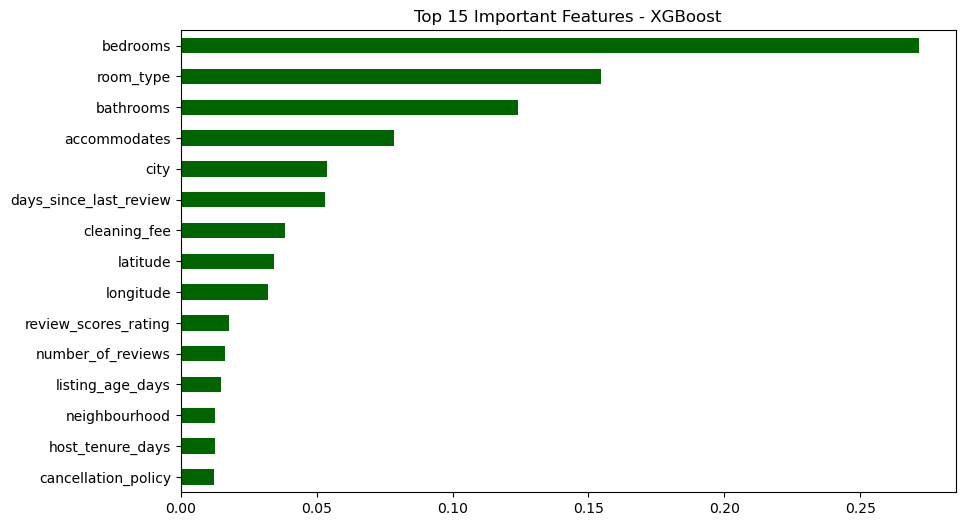

In [77]:
#Feature Importance for Interpretability
#1. XGBoost
import pandas as pd

xgb_importance = pd.Series(xgb.feature_importances_, index=X_train.columns)
xgb_importance.nlargest(15).plot(kind='barh', figsize=(10, 6), color='darkgreen')
plt.title("Top 15 Important Features - XGBoost")
plt.gca().invert_yaxis()
plt.show()


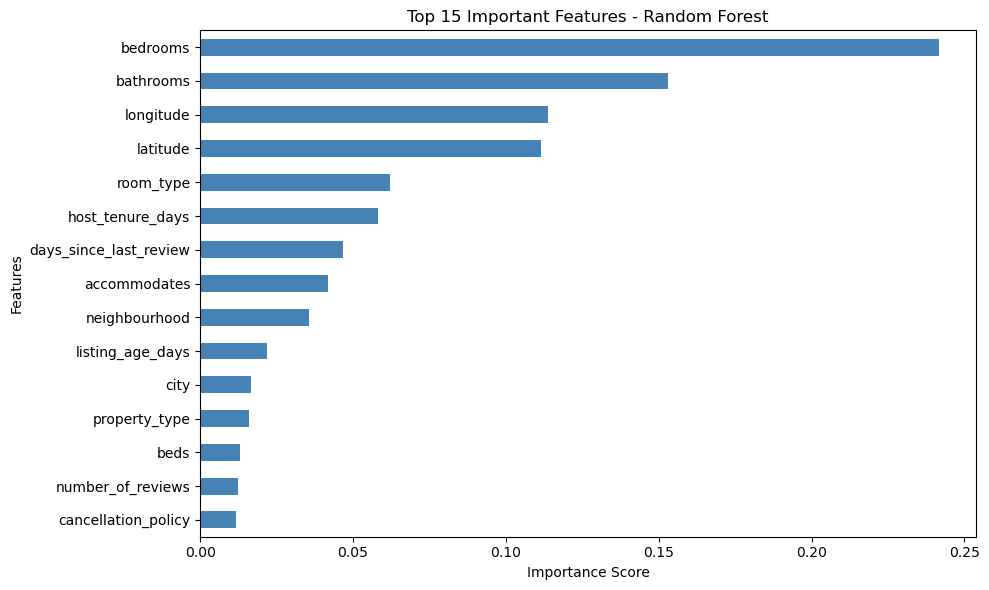

In [78]:
#Feature Importance for Interpretability
#2. Random Forest Feature Importance
rf_importance = pd.Series(best_rf.feature_importances_, index=X_train.columns)
rf_importance.nlargest(15).plot(kind='barh', figsize=(10, 6), color='steelblue')
plt.title("Top 15 Important Features - Random Forest")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

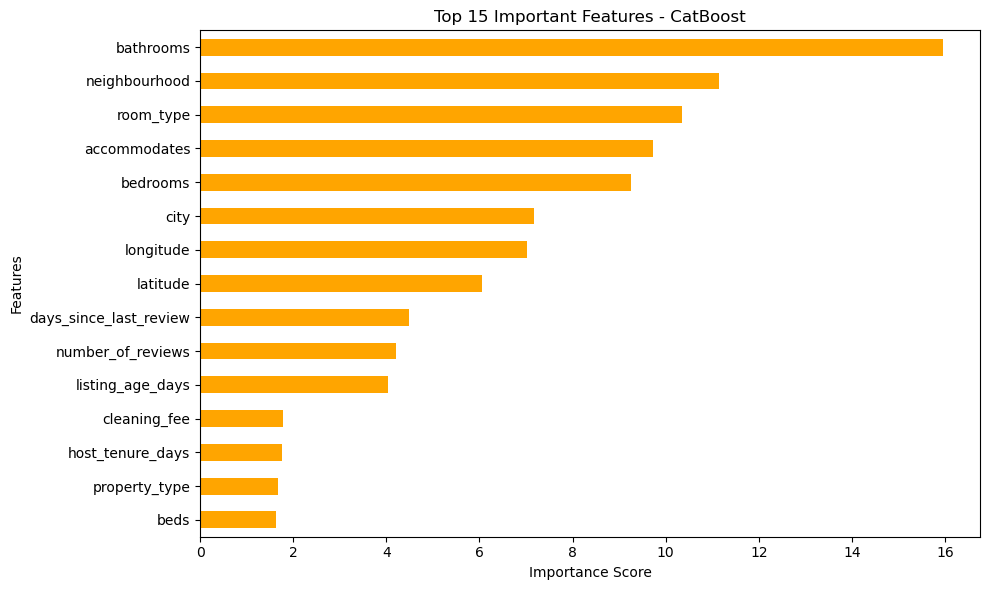

In [79]:
#CatBoost Feature Importance
cat_importance = pd.Series(catboost.get_feature_importance(), index=X_train.columns)
cat_importance.nlargest(15).plot(kind='barh', figsize=(10, 6), color='orange')
plt.title("Top 15 Important Features - CatBoost")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

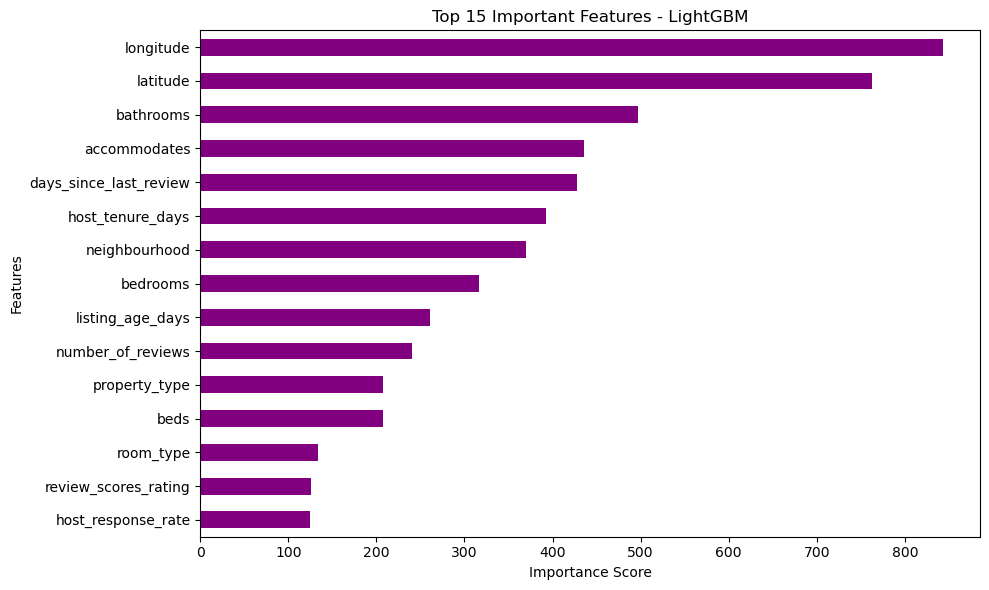

In [80]:
#Light BGM Feature Importance
lgbm_importance = pd.Series(lgbm.feature_importances_, index=X_train.columns)
lgbm_importance.nlargest(15).plot(kind='barh', figsize=(10, 6), color='purple')
plt.title("Top 15 Important Features - LightGBM")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [82]:
# Creating a list to store results
results = []

def collect_metrics(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    accuracy = r2 * 100  # Treating R² as accuracy-like

    results.append({
        'Model': model_name,
        'Accuracy (%)': round(accuracy, 2),
        'RMSE': round(rmse, 2),
        'MAE': round(mae, 2),
        'R² Score': round(r2, 4)
    })


In [83]:
collect_metrics("Linear Regression", y_test, y_pred_lr)
collect_metrics("Support Vector Regressor", y_test, y_pred_svr)
collect_metrics("Random Forest (Tuned)", y_test, y_pred_rf_best)
collect_metrics("XGBoost (Tuned)", y_test, y_pred_xgb_best)
collect_metrics("LightGBM", y_test, y_pred_lgbm)
collect_metrics("CatBoost", y_test, y_pred_cat)
collect_metrics("HistGradientBoosting", y_test, y_pred_hgb)

In [84]:
# Display the results as a DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by='RMSE', ascending=True, inplace=True)  # Optional: sort by best RMSE
print(results_df.to_string(index=False))

                   Model  Accuracy (%)   RMSE   MAE  R² Score
                CatBoost         58.13 110.74 52.60    0.5813
                LightGBM         57.88 111.06 53.30    0.5788
         XGBoost (Tuned)         57.70 111.30 52.74    0.5770
    HistGradientBoosting         57.57 111.48 53.59    0.5757
   Random Forest (Tuned)         54.95 114.86 54.27    0.5495
       Linear Regression         39.55 133.05 71.24    0.3955
Support Vector Regressor         26.73 146.48 63.11    0.2673


In [85]:
#Predicting price of a new listing 
# One example new listing (values as per X_train column to avoid any errors)
new_listing = pd.DataFrame([{
    'property_type': 12,            # label encoded (e.g., Apartment)
    'room_type': 1,                 # label encoded (e.g., Entire home/apt)
    'accommodates': 4,
    'bathrooms': 1.5,
    'bed_type': 0,
    'cancellation_policy': 2,
    'cleaning_fee': 1,
    'city': 25,
    'host_has_profile_pic': 1,
    'host_identity_verified': 1,
    'host_response_rate': 98.0,
    'instant_bookable': 1,
    'latitude': 40.7128,
    'longitude': -74.0060,
    'neighbourhood': 40,
    'number_of_reviews': 55,
    'review_scores_rating': 92.0,
    'bedrooms': 2,
    'beds': 2,
    'host_tenure_days': 1100,
    'listing_age_days': 900,
    'days_since_last_review': 20
}])

In [96]:
predicted_price = catboost.predict(new_listing)
print(f"Predicted Price: ₹{predicted_price[0]:.2f}")

log_price = np.log(predicted_price[0])
print(f"Predicted Log Price: {log_price:.4f}")


Predicted Price: ₹196.86
Predicted Log Price: 5.2825
